# Data And Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
apps = pd.read_csv('Datasets/googleplaystore.csv')
display(apps.head())
display(apps.info())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None

In [3]:
display(apps.describe())
display(apps.describe(include=['O']))

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [4]:
apps_old = apps.copy()

# Data Cleaning and Analysis on Each Column
## Category

In [5]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
apps.iloc[10472,1:] = apps.iloc[10472,1:].shift(1)
apps.iloc[10472,1] = 'ART_AND_DESIGN'
apps.iloc[10472,9] = 'Art & Design'

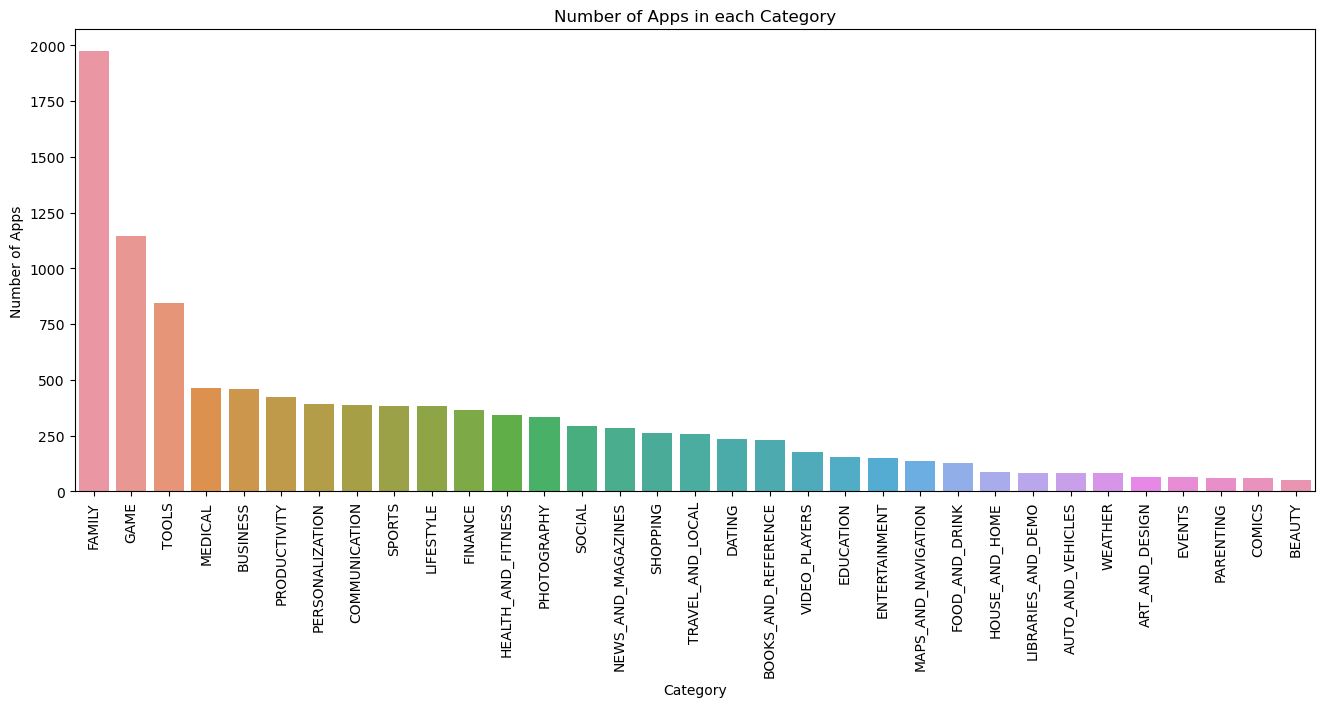

In [7]:
apps_cat = apps.groupby('Category')['App'].count().sort_values(ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(x=apps_cat.index,y=apps_cat.values)
plt.title('Number of Apps in each Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

## Rating

In [8]:
apps['Rating'] = apps['Rating'].astype('float')

<Axes: xlabel='Rating'>

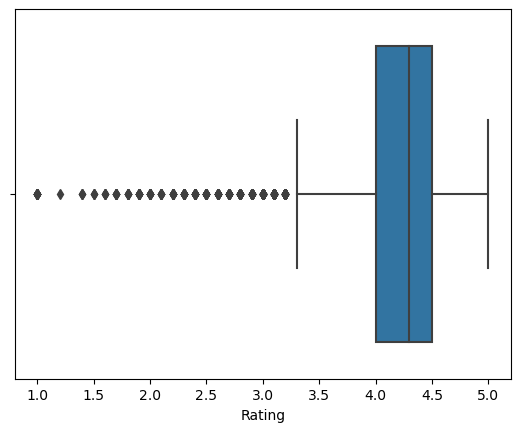

In [9]:
sns.boxplot(data=apps,x='Rating')

## Reviews

In [10]:
apps['Reviews'] = apps['Reviews'].astype('int64')

<Axes: xlabel='Reviews', ylabel='Density'>

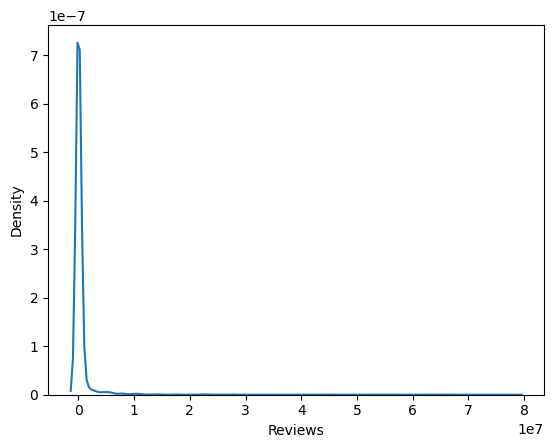

In [42]:
sns.kdeplot(data=apps,x='Reviews')

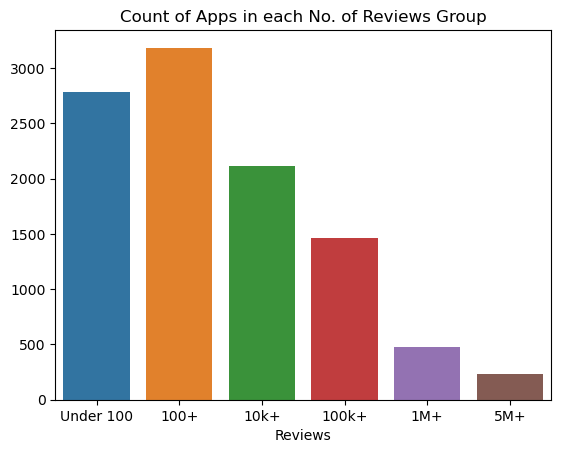

In [62]:
review_no = pd.cut(apps['Reviews'],[0,100,10000,100000,1000000,5000000,78158307],
                   labels=['Under 100','100+','10k+','100k+','1M+','5M+']).value_counts()
sns.barplot(x=review_no.index, y = review_no.values)
plt.title('Count of Apps in each No. of Reviews Group')
plt.show()

## Size

In [12]:
k_size = apps[apps['Size'].str.contains('k')].index
apps.iloc[apps[apps['Size']=='Varies with device'].index,4] = None
apps['Size'] = apps['Size'].str.replace('M','').str.replace('k','')
apps['Size'] = apps['Size'].astype('float64')
apps.iloc[k_size,4] = apps.iloc[k_size,4]/1000

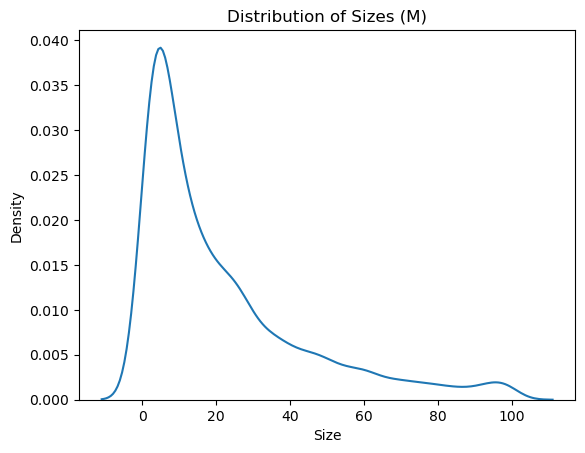

In [13]:
sns.kdeplot(data=apps,x='Size')
plt.title('Distribution of Sizes (M)')
plt.show()

## Installs

In [14]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [15]:
apps.loc[apps['Installs']=='0+','Installs'] = apps.loc[apps['Installs']=='0+','Installs'].str.replace('0+','0')

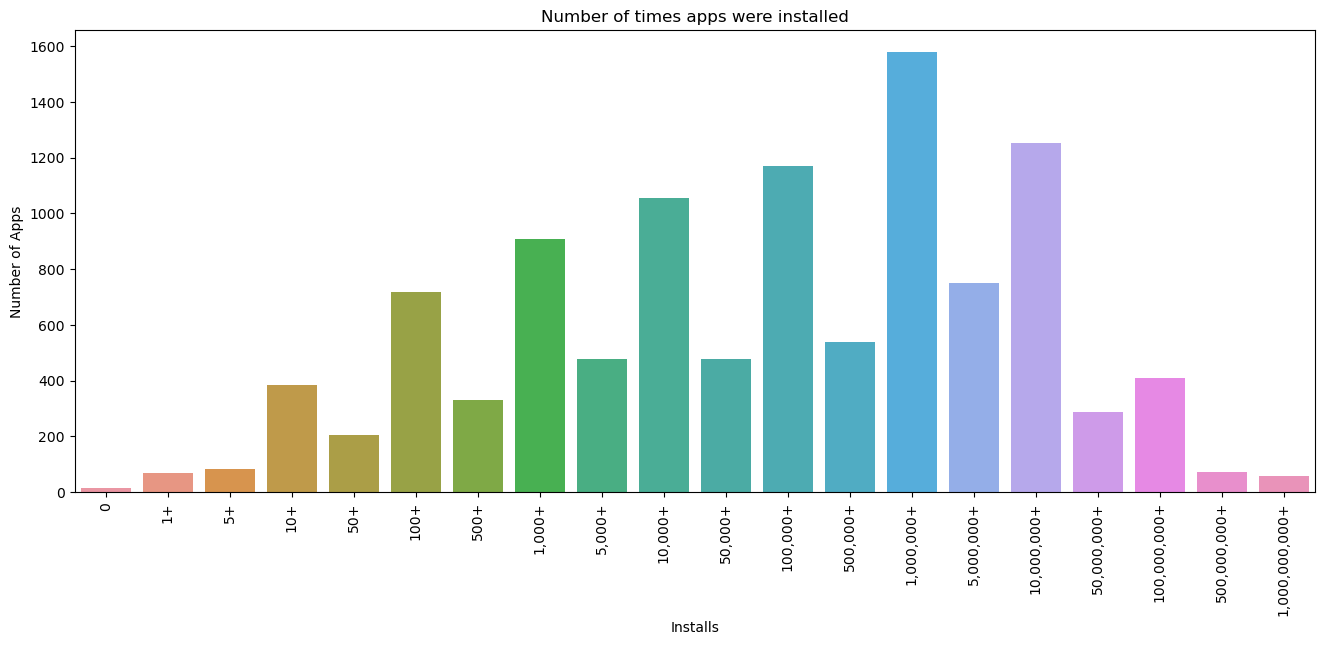

In [16]:
apps_installs = apps.groupby('Installs')['App'].count().reset_index()
apps_installs['Length'] = apps_installs['Installs'].str.len()
apps_installs['First Index'] = apps_installs['Installs'].str[0]
apps_installs = apps_installs.sort_values(['Length','First Index'])

plt.figure(figsize=(16,6))
sns.barplot(data=apps_installs,x='Installs',y='App')
plt.title('Number of times apps were installed')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

## Type

In [17]:
apps.loc[apps['Type'].isna(),'Type'] = 'Free'
apps['Type'].unique()

array(['Free', 'Paid'], dtype=object)

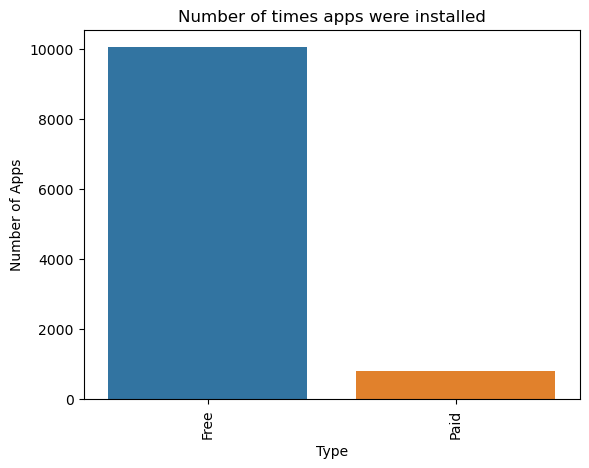

In [18]:
sns.countplot(data=apps,x='Type')
plt.title('Number of Apps by Payment Type')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

## Price

In [19]:
apps['Price'] = apps['Price'].str.replace('$','').astype('float')

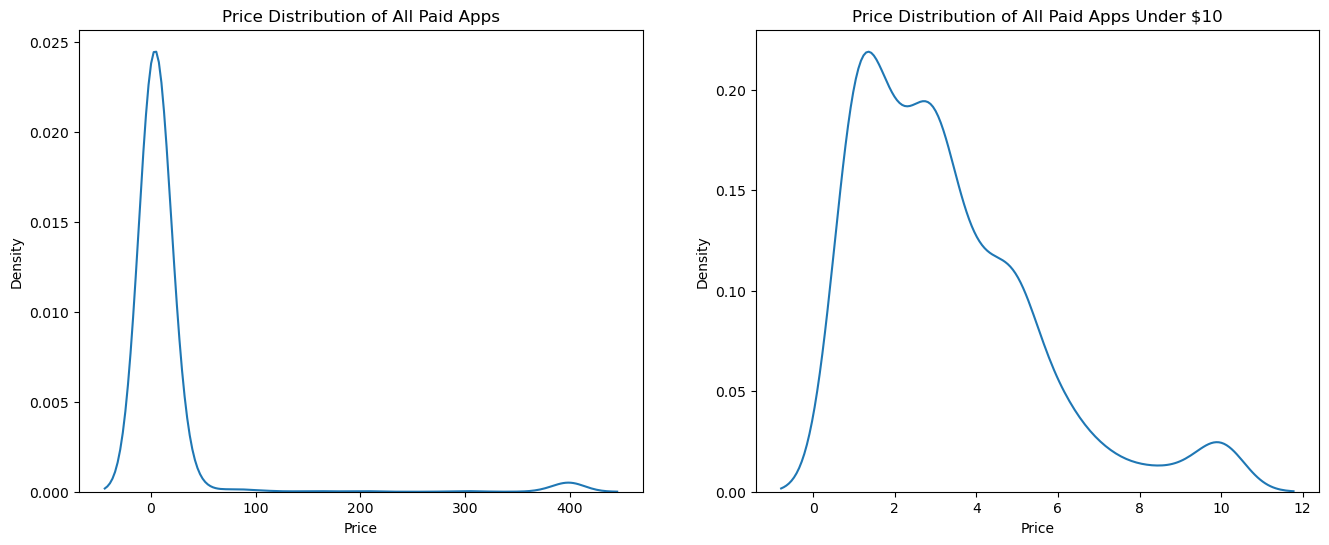

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
sns.kdeplot(data=apps[apps['Price']>0], x='Price',ax=ax[0])
ax[0].set_title('Price Distribution of All Paid Apps')
sns.kdeplot(data=apps[(apps['Price']>0)&(apps.Price <=10)], x='Price',ax=ax[1])
ax[1].set_title('Price Distribution of All Paid Apps Under $10')
plt.show()

## Content Rating

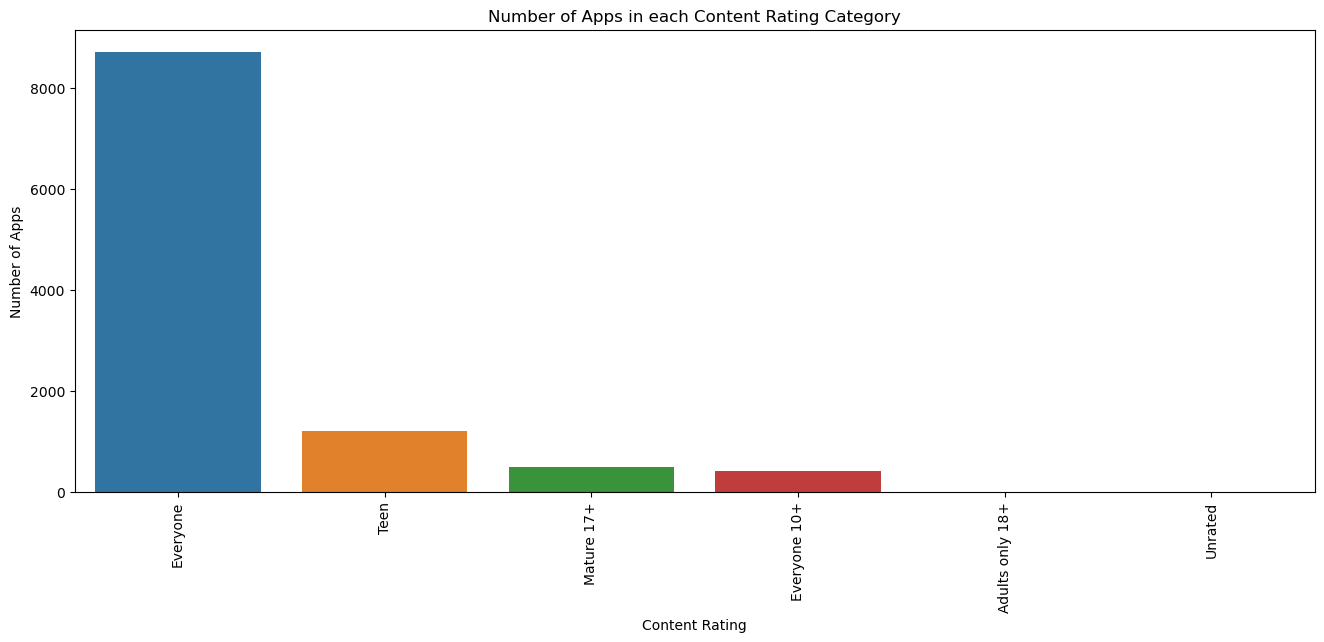

In [21]:
apps['Content Rating'].unique()
apps_cat = apps.groupby('Content Rating')['App'].count().sort_values(ascending=False)
plt.figure(figsize=(16,6))
sns.barplot(x=apps_cat.index,y=apps_cat.values)
plt.title('Number of Apps in each Content Rating Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

## Genres

Text(0.5, 1.0, 'Top Genres')

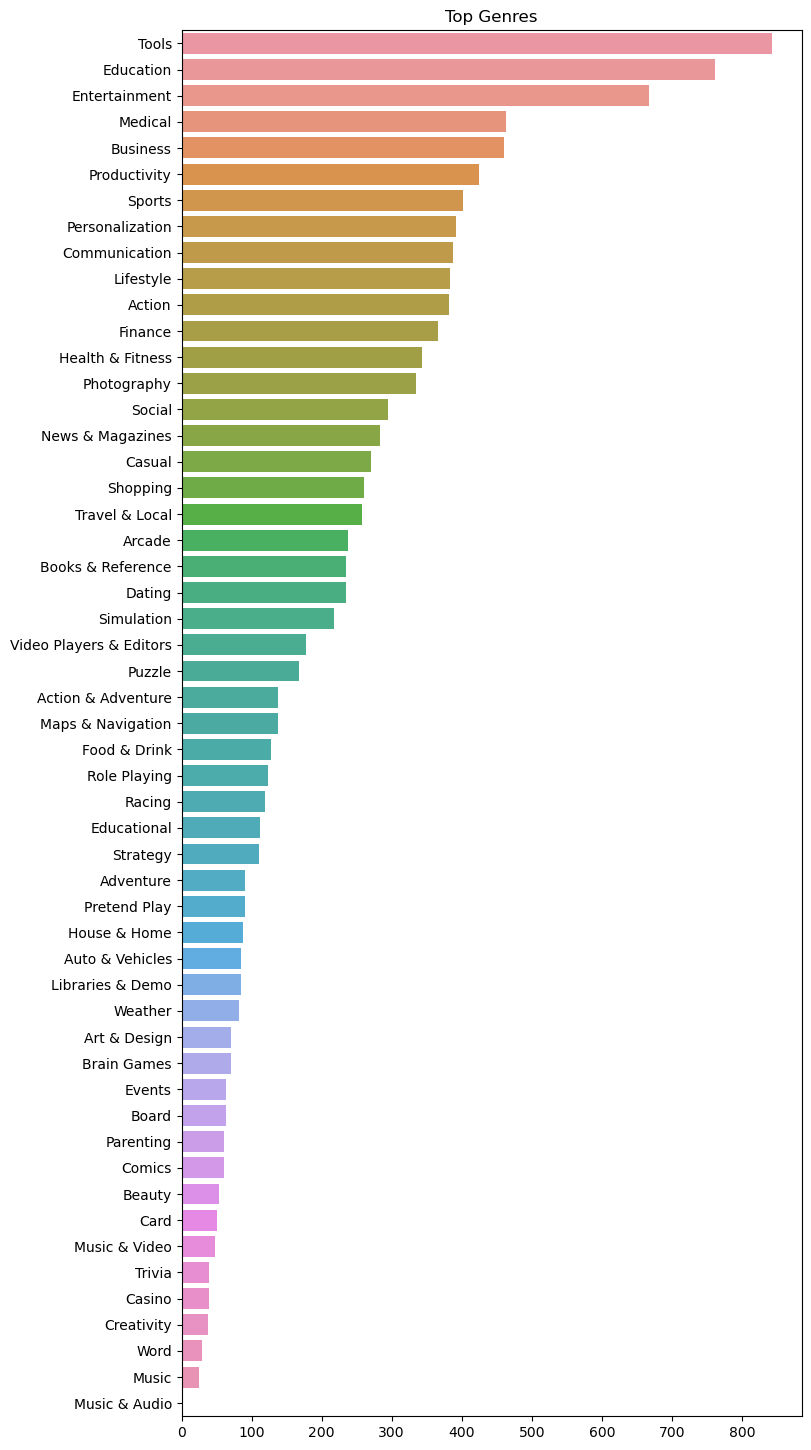

In [22]:
genres_split = apps['Genres'].str.split(';',expand=True)
genres_combined = pd.concat([genres_split[0],genres_split[1]]).dropna()
genres_count = genres_combined.value_counts()
plt.figure(figsize=(8,18))
sns.barplot(x=genres_count.values,y=genres_count.index)
plt.title('Top Genres')

## Last Updated

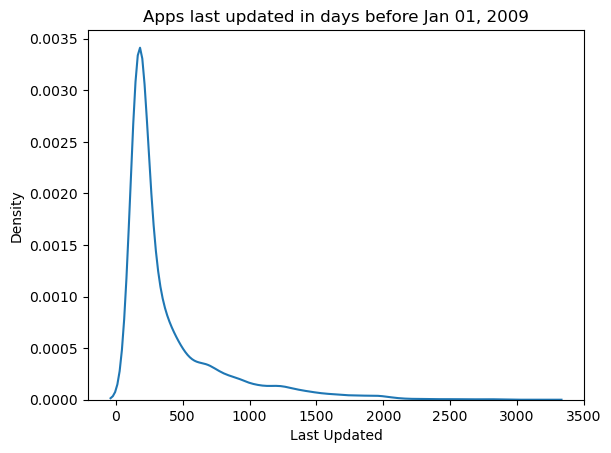

In [23]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])
update_days = (pd.to_datetime('01-01-2019')-apps['Last Updated']).dt.days
sns.kdeplot(update_days)
plt.title('Apps last updated in days before Jan 01, 2009')
plt.show()

## Android Ver

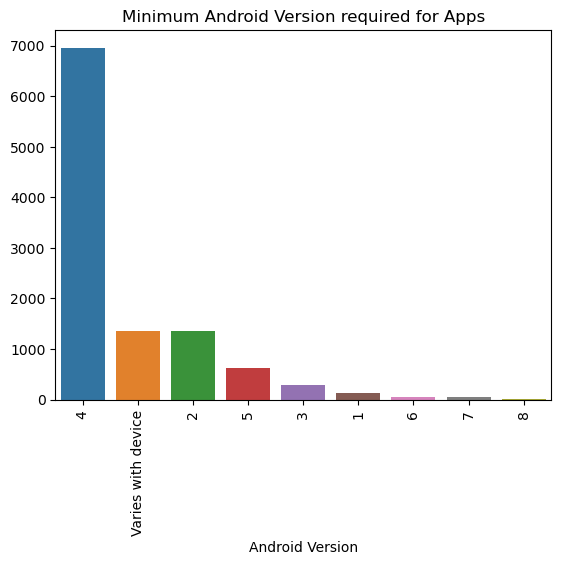

In [24]:
min_android_ver = apps['Android Ver'].dropna().str.split('.',expand=True)[0].value_counts()
sns.barplot(x=min_android_ver.index,y=min_android_ver.values)
plt.xticks(rotation=90)
plt.xlabel('Android Version')
plt.title('Minimum Android Version required for Apps')
plt.show()

# Final Dataset

In [63]:
display(apps.head())
display(apps.info())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            9146 non-null   float64       
 5   Installs        10841 non-null  object        
 6   Type            10841 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.1+ MB


None